In [1]:
import pandas as pd

In [2]:
csv_path_full = '../data/raw/BooksDataset.csv'
full = pd.read_csv(csv_path_full)
full.head(5)

,Title,Authors,Description,Category,Publisher,Publish Date,Price
0,Goat Brothers,"By Colton, Larry",NaN,"History , General",Doubleday,"Friday, January 1, 1993",Price Starting at $8.79
1,The Missing Person,"By Grumbach, Doris",NaN,"Fiction , General",Putnam Pub Group,"Sunday, March 1, 1981",Price Starting at $4.99
2,Don't Eat Your Heart Out Cookbook,"By Piscatella, Joseph C.",NaN,"Cooking , Reference",Workman Pub Co,"Thursday, September 1, 1983",Price Starting at $4.99
3,When Your Corporate Umbrella Begins to Leak: A...,"By Davis, Paul D.",NaN,NaN,Natl Pr Books,"Monday, April 1, 1991",Price Starting at $4.99
4,Amy Spangler's Breastfeeding : A Parent's Guide,"By Spangler, Amy",NaN,NaN,Amy Spangler,"Saturday, February 1, 1997",Price Starting at $5.32


In [3]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103082 entries, 0 to 103081
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Title         103082 non-null  object
 1   Authors       103082 non-null  object
 2   Description   70213 non-null   object
 3   Category      76912 non-null   object
 4   Publisher     103074 non-null  object
 5   Publish Date  103082 non-null  object
 6   Price         103082 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


In [4]:
full.dropna(subset=['Description'], inplace=True)

In [5]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70213 entries, 7 to 103081
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         70213 non-null  object
 1   Authors       70213 non-null  object
 2   Description   70213 non-null  object
 3   Category      65305 non-null  object
 4   Publisher     70213 non-null  object
 5   Publish Date  70213 non-null  object
 6   Price         70213 non-null  object
dtypes: object(7)
memory usage: 4.3+ MB


In [6]:
full.dropna(subset=['Category'], inplace=True)

In [7]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65305 entries, 7 to 103081
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         65305 non-null  object
 1   Authors       65305 non-null  object
 2   Description   65305 non-null  object
 3   Category      65305 non-null  object
 4   Publisher     65305 non-null  object
 5   Publish Date  65305 non-null  object
 6   Price         65305 non-null  object
dtypes: object(7)
memory usage: 4.0+ MB


In [8]:
full.Category.value_counts()

Category
Fiction , General                                           2274
Fiction , Literary                                          1647
Fiction , Mystery & Detective , General                     1555
Fiction , Thrillers , General                               1105
Fiction , Thrillers , Suspense                              1042
                                                            ... 
Law , Taxation                                                 1
Body, Mind & Spirit , Divination , General                     1
Juvenile Fiction , Animals , Wolves, Coyotes & Wild Dogs       1
Juvenile Fiction , Performing Arts , Television & Radio        1
Technology & Engineering , Radio                               1
Name: count, Length: 2983, dtype: int64

In [9]:
full['Category'] = (
    full['Category']
    .str.replace('Fiction', '', regex=False)          # remove 'Fiction'
    .str.replace(r'\s*,\s*', ', ', regex=True)       # fix spacing around commas
    .str.strip(', ')                                  # remove leading/trailing commas and spaces
    .replace('', 'Unknown')                           # replace empty strings
)

In [10]:
full.Category.value_counts()

Category
General                                          2274
Literary                                         1647
Mystery & Detective, General                     1555
Thrillers, General                               1105
Thrillers, Suspense                              1042
                                                 ... 
Juvenile, Performing Arts, Television & Radio       1
Language Arts & Disciplines, Public Speaking        1
Medical, Perinatology & Neonatology                 1
Religion, Christianity, Saints & Sainthood          1
Computers, Programming Languages, Pascal            1
Name: count, Length: 2982, dtype: int64

In [11]:
full['Category'] = full['Category'].str.extract(r'^(\w+)')

In [12]:
threshold_2k = 2000

# Get categories with counts > threshold
categories_over_2k = full['Category'].value_counts()[full['Category'].value_counts() > threshold_2k].index

# Filter rows where Category is in those categories
full_2k = full[full['Category'].isin(categories_over_2k)]

full_2k.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34429 entries, 8 to 103072
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         34429 non-null  object
 1   Authors       34429 non-null  object
 2   Description   34429 non-null  object
 3   Category      34429 non-null  object
 4   Publisher     34429 non-null  object
 5   Publish Date  34429 non-null  object
 6   Price         34429 non-null  object
dtypes: object(7)
memory usage: 2.1+ MB


In [13]:
threshold_1k = 1000

# Get categories with counts > threshold
categories_over_1k = full['Category'].value_counts()[full['Category'].value_counts() > threshold_1k].index

# Filter rows where Category is in those categories
full_1k = full[full['Category'].isin(categories_over_1k)]

full_1k.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47933 entries, 8 to 103072
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         47933 non-null  object
 1   Authors       47933 non-null  object
 2   Description   47933 non-null  object
 3   Category      47933 non-null  object
 4   Publisher     47933 non-null  object
 5   Publish Date  47933 non-null  object
 6   Price         47933 non-null  object
dtypes: object(7)
memory usage: 2.9+ MB


In [14]:
full_1k.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47933 entries, 8 to 103072
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         47933 non-null  object
 1   Authors       47933 non-null  object
 2   Description   47933 non-null  object
 3   Category      47933 non-null  object
 4   Publisher     47933 non-null  object
 5   Publish Date  47933 non-null  object
 6   Price         47933 non-null  object
dtypes: object(7)
memory usage: 2.9+ MB


In [15]:
def remove_cols(df):
    cols = ['Title','Authors','Publisher','Publish Date','Price']
    df.drop(cols, axis=1, inplace = True)
    return df

In [16]:
remove_cols(full_1k).to_csv("../data/processed/full_1k.csv", index=False)
remove_cols(full_2k).to_csv("../data/processed/full_2k.csv", index=False)

C:\Users\the3s\AppData\Local\Temp\ipykernel_22608\319236161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(cols, axis=1, inplace = True)
C:\Users\the3s\AppData\Local\Temp\ipykernel_22608\319236161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(cols, axis=1, inplace = True)


In [17]:
full_2k.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34429 entries, 8 to 103072
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  34429 non-null  object
 1   Category     34429 non-null  object
dtypes: object(2)
memory usage: 806.9+ KB


C:\Users\the3s\AppData\Local\Temp\ipykernel_22608\519519695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_2k['num_words'] = full_2k['Description'].apply(lambda x: len(str(x).split()))


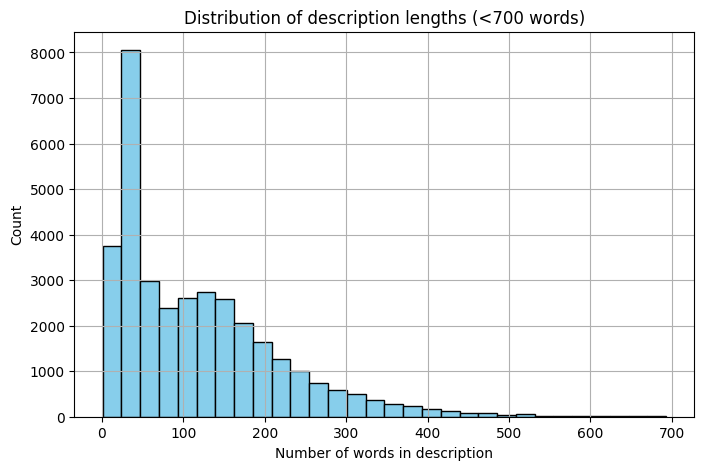

In [22]:
import matplotlib.pyplot as plt

# Count words
full_2k['num_words'] = full_2k['Description'].apply(lambda x: len(str(x).split()))

# Filter for descriptions with less than 700 words
filtered = full_2k[full_2k['num_words'] < 700]

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(filtered['num_words'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Number of words in description")
plt.ylabel("Count")
plt.title("Distribution of description lengths (<700 words)")
plt.grid(True)
plt.show()
